## Detect Cyber Intrusion Using Machine Learning

### Task 1: Import Libraries and Modules

In [1]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
from sklearn.model_selection import train_test_split
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
from sklearn.preprocessing import LabelEncoder, StandardScaler


Matplotlib is building the font cache; this may take a moment.


### Task 2: Preprocess the Dataset

#### Load CSV file into a DataFrame

In [30]:
data_frame = df = pd.read_csv('/usercode/SIMARGL2021.csv')


#### Display the first few rows of the CSV file


In [31]:
print(data_frame.head())

   BIFLOW_DIRECTION  DIRECTION DST_TO_SRC_SECOND_BYTES  FIREWALL_EVENT  \
0                 1          0                     138               0   
1                 1          0                      75               0   
2                 1          0                      40               0   
3                 1          0                     166               0   
4                 1          0                       ,               0   

   FIRST_SWITCHED  FLOW_ACTIVE_TIMEOUT  FLOW_DURATION_MICROSECONDS  \
0      1622174400                  120                         682   
1      1622174400                  120                         579   
2      1622174400                  120                         213   
3      1622174400                  120                         257   
4      1622174400                  120                           0   

   FLOW_DURATION_MILLISECONDS  FLOW_END_MILLISECONDS  FLOW_END_SEC  ...  \
0                           0           1.622170e+12    162

#### Select the 15 features

In [32]:
selected_columns = [
'DST_TOS', 'SRC_TOS', 'TCP_WIN_SCALE_OUT', 'TCP_WIN_SCALE_IN', 'TCP_FLAGS','TCP_WIN_MAX_OUT', 'PROTOCOL', 'TCP_WIN_MIN_OUT', 'TCP_WIN_MIN_IN','TCP_WIN_MAX_IN', 'LAST_SWITCHED', 'TCP_WIN_MSS_IN', 'TOTAL_FLOWS_EXP','FIRST_SWITCHED', 'FLOW_DURATION_MILLISECONDS', 'LABEL'
]
data_frame = data_frame[selected_columns]
data_frame.head()

,DST_TOS,SRC_TOS,TCP_WIN_SCALE_OUT,TCP_WIN_SCALE_IN,TCP_FLAGS,TCP_WIN_MAX_OUT,PROTOCOL,TCP_WIN_MIN_OUT,TCP_WIN_MIN_IN,TCP_WIN_MAX_IN,LAST_SWITCHED,TCP_WIN_MSS_IN,TOTAL_FLOWS_EXP,FIRST_SWITCHED,FLOW_DURATION_MILLISECONDS,LABEL
0,0,0,0,0,0,0,17,0,0,0,1622174400,0,1365973,1622174400,0,Normal flow
1,0,0,0,0,0,0,17,0,0,0,1622174400,0,1365974,1622174400,0,Normal flow
2,40,40,0,0,22,0,6,0,1024,1024,1622174400,0,1365976,1622174400,0,Normal flow
3,0,0,0,0,0,0,17,0,0,0,1622174400,0,1365978,1622174400,0,Normal flow
4,0,196,0,0,0,0,1,0,0,0,1622174400,0,1365979,1622174400,0,Normal flow


#### Remove duplicate rows

In [33]:
data_frame.drop_duplicates(inplace=True)



/tmp/ipykernel_148/3340748052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame.drop_duplicates(inplace=True)


### Task 3: Explore the Dataset

#### Display each label and its count via a bar graph


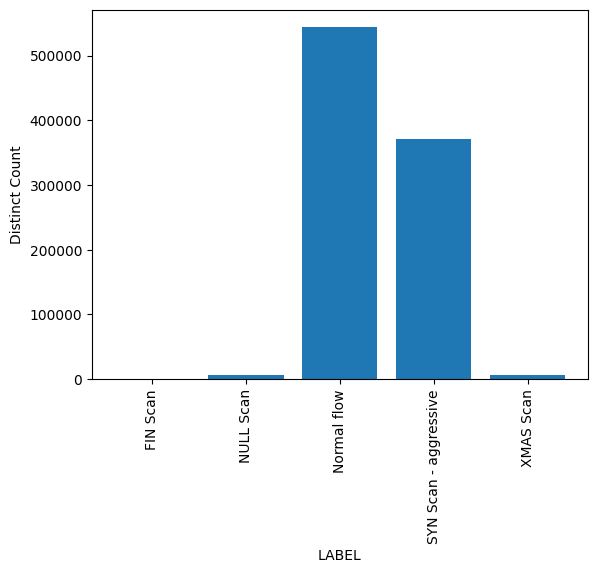

In [34]:
grouped_data = data_frame.groupby('LABEL').size()
fig, ax = plt.subplots(1)
ax.bar(grouped_data.index, grouped_data.values)
ax.set(xlabel='LABEL', ylabel='Distinct Count')
plt.xticks(rotation=90)
plt.show()

#### Plot the distinct counts

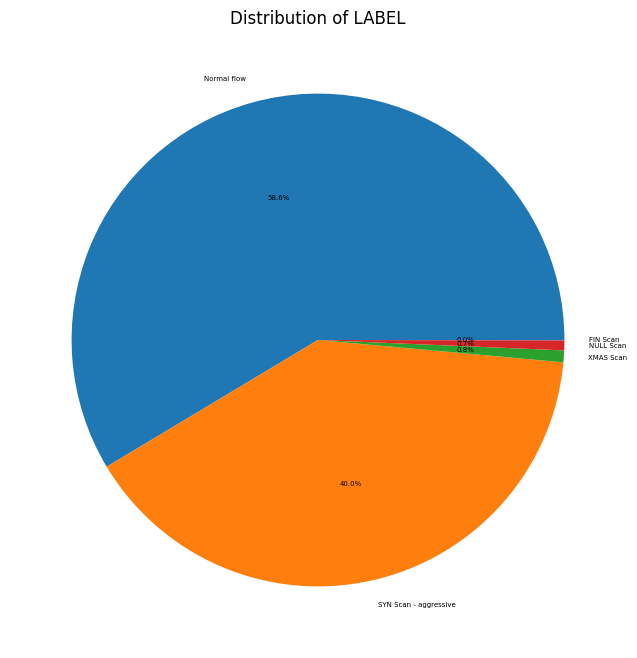

In [35]:
grouped_data = data_frame['LABEL'].value_counts()
fig, ax = plt.subplots(figsize=(8,8))
ax.pie(grouped_data.values, labels=grouped_data.index, autopct='%1.1f%%', textprops={'fontsize': 5})
ax.set_title('Distribution of LABEL')
plt.show()



### Task 4: Standardize and Encode the Data

#### Create a copy of the data

In [36]:
normalized_data = data_frame.copy()
numerical_columns = normalized_data.select_dtypes(include=['float64', 'int64']).columns

#### Extract the numerical columns to be normalized

In [37]:
non_numerical_columns = normalized_data.select_dtypes(exclude=['float64', 'int64']).columns


#### Extract the non-numerical columns to be label encoded

In [38]:
label_encoder = LabelEncoder()
normalized_data[non_numerical_columns] = normalized_data[non_numerical_columns].apply(label_encoder.fit_transform)


#### Standardize the numerical columns

In [39]:
scaler = StandardScaler() 
normalized_data[numerical_columns] = scaler.fit_transform(normalized_data[numerical_columns])


In [40]:
normalized_data.head()



,DST_TOS,SRC_TOS,TCP_WIN_SCALE_OUT,TCP_WIN_SCALE_IN,TCP_FLAGS,TCP_WIN_MAX_OUT,PROTOCOL,TCP_WIN_MIN_OUT,TCP_WIN_MIN_IN,TCP_WIN_MAX_IN,LAST_SWITCHED,TCP_WIN_MSS_IN,TOTAL_FLOWS_EXP,FIRST_SWITCHED,FLOW_DURATION_MILLISECONDS,LABEL
0,-0.202520,-0.275953,-0.304294,-0.340399,-1.094170,-0.296931,1.602891,-0.296429,-0.373770,-0.377188,0.798357,-1.065921,-0.822983,0.798359,-0.199755,2
1,-0.202520,-0.275953,-0.304294,-0.340399,-1.094170,-0.296931,1.602891,-0.296429,-0.373770,-0.377188,0.798357,-1.065921,-0.822982,0.798359,-0.199755,2
2,1.521307,0.913199,-0.304294,-0.340399,0.773889,-0.296931,-0.512673,-0.296429,-0.312306,-0.316160,0.798357,-1.065921,-0.822981,0.798359,-0.199755,2
3,-0.202520,-0.275953,-0.304294,-0.340399,-1.094170,-0.296931,1.602891,-0.296429,-0.373770,-0.377188,0.798357,-1.065921,-0.822980,0.798359,-0.199755,2
4,-0.202520,5.550894,-0.304294,-0.340399,-1.094170,-0.296931,-1.474293,-0.296429,-0.373770,-0.377188,0.798357,-1.065921,-0.822979,0.798359,-0.199755,2


### Task 5: Separate Labels and Split Data into Train and Test Subsets

#### Separate data and labels

In [41]:
X = normalized_data.drop(columns=['LABEL'],axis=1)

Y = normalized_data['LABEL']


#### Split data into train and test subsets


In [42]:
X_train, X_test, y_train, y_test = train_test_split (X, Y, test_size=0.3, random_state=42)



### Task 6: Train Random Forest

#### Create a random forest classifier

In [43]:
rf_classifier = RandomForestClassifier(n_estimators=30)


#### Measure the training time

In [44]:
start_time = time.time() 
rf_classifier.fit(X_train, y_train)
end_time = time.time()
training_timeRFC = end_time - start_time

### Task 7: Test Random Forest

#### Make predictions on the test set


In [45]:
y_pred = rf_classifier.predict(X_test)


#### Calculate and print the accuracy, F1 score, precision, and recall

In [46]:
accuracyRFC = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted') 
precision = precision_score(y_test, y_pred,average='weighted')  
recall = recall_score(y_test, y_pred, average='weighted')
print("Training time:", training_timeRFC)
print("Accuracy:", accuracyRFC)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)



Training time: 11.25277304649353
Accuracy: 0.9986312295223314
F1 Score: 0.9986379278179455
Precision: 0.9986460304060528
Recall: 0.9986312295223314


### Task 8: Train Decision Tree

#### Create a DecisionTreeClassifier with criterion='entropy' and max_depth=4

In [47]:
dt_classifier = DecisionTreeClassifier(criterion='entropy',max_depth=4)


#### Measure the training time


In [48]:
start_time = time.time()
dt_classifier.fit(X_train, y_train)
end_time = time.time()
training_timeDT = end_time - start_time

### Task 9: Test Decision Tree

#### Make predictions on the test set

In [49]:
y_pred = dt_classifier.predict(X_test)


#### Calculate and print the accuracy, F1 score, precision, and recall

In [50]:
accuracyDT = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Training time:", training_timeDT)
print("Accuracy:", accuracyDT)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)



Training time: 1.635835886001587
Accuracy: 0.9955056906363166
F1 Score: 0.995816927472435
Precision: 0.9966325907822287
Recall: 0.9955056906363166


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Task 10: Train Naive Bayes

#### Create a Gaussian Naive Bayes classifier

In [51]:
nb_classifier = GaussianNB()

#### Measure the training time

In [53]:
start_time = time.time()
nb_classifier.fit(X_train, y_train)
end_time = time.time()
training_timeNB = end_time - start_time


### Task 11: Test Naive Bayes

#### Make predictions on the test dataset

In [54]:
y_pred = nb_classifier.predict(X_test)

#### Calculate and print the accuracy, F1 sore, precision, and recall

In [55]:
accuracyNB = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, 
average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print("Training time:", training_timeNB)
print("Accuracy:", accuracyNB)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

Training time: 0.2523021697998047
Accuracy: 0.9912089728114043
F1 Score: 0.9923627270670682
Precision: 0.9948001931044119
Recall: 0.9912089728114043


### Task 12: Compare the Accuracy and Training Times

#### Accuracy scores and training time of the three algorithms

In [56]:
accuracy_scores = [accuracyRFC, accuracyDT, accuracyNB]
train_times = [training_timeRFC, training_timeDT, training_timeNB]

#### Names of the algorithms

In [57]:
algorithm_names = ['Random Forest', 'Decision Tree', 'Gaussian Naive Bayes']

#### Create a bar plot for accuracy

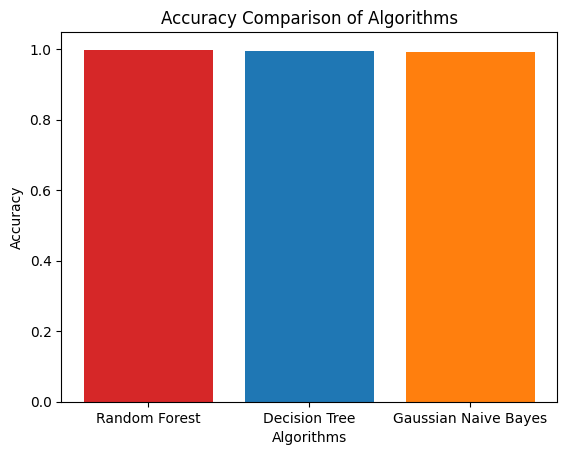

In [64]:
bar_colors = ['tab:red', 'tab:blue', 'tab:orange']
plt.bar(algorithm_names, accuracy_scores, label=algorithm_names, color=bar_colors)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Algorithms')
# plt.legend(title='Algorithm Type')
plt.show()

#### Create a bar plot for training time

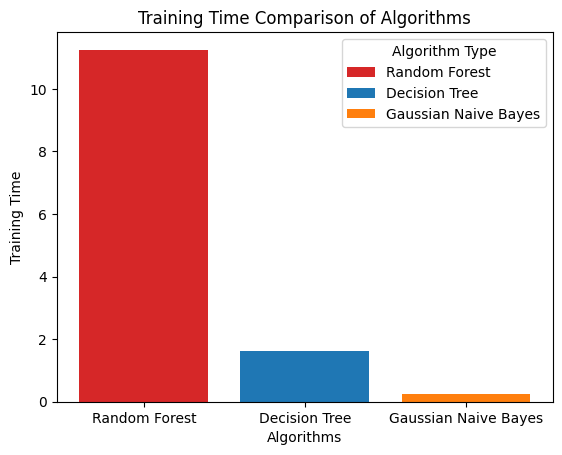

In [68]:
bar_colors = ['tab:red', 'tab:blue', 'tab:orange']
plt.bar(algorithm_names, train_times, label=algorithm_names, color=bar_colors)
plt.xlabel('Algorithms')
plt.ylabel('Training Time')
plt.title('Training Time Comparison of Algorithms')
plt.legend(title='Algorithm Type')
plt.show()